In [1]:
import pandas as pd
import numpy as np
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
#load the dataset into pandas dataframe
df = pd.read_excel('https://data.london.gov.uk/download/london-atmospheric-emissions-inventory-2013/8c520de2-c518-4e64-932c-0071ac826742/LAEI2013_MajorRoads_EmissionsbyLink_2013.xlsx')
#drop the unnecessary columns that are empty
df = df.drop('ElectricLgv', axis=1)
df = df.drop('ElectricCar', axis=1)
df = df.dropna()

In [3]:
#select the features that will help to predict the Car emission excluding unnecessary columns and Motorcycle
X = df[['Location_ExactCut', 'BoroughName_ExactCut', 'Lts', 'Length (m)', 'Emissions', 'Pollutant']]
#select on Car column for y variable
y = df['Car']

#view the shape of each variable to ensure that it has same number of rows
print(X.shape)
print(y.shape)

(366220, 6)
(366220,)


In [4]:
#split the train and test data using train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.001, random_state=42)

# encode variables with ordinal encoding so that the categorical data become a numerical for the understanding of model
encoder = ce.OrdinalEncoder(cols=['Location_ExactCut', 'BoroughName_ExactCut', 'Pollutant', 'Emissions'])
X = encoder.fit_transform(X)
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
X_train.shape

(365853, 6)

# Random Forest Regression

In [5]:
#create object of RandomForestRegressor
rfr = RandomForestRegressor()
# train the model by providing X and y
rfr.fit(X_train, y_train)
#store the trained model into binary file (pickle)
with open("rfr.pickle", "wb") as f:
    pickle.dump(rfr, f)

In [6]:
#this function takes of features and predicts the emission
def predict_rf(x):
    # encode variables with ordinal encoding so that the categorical data become a numerical for the understanding of model
    encoder = ce.OrdinalEncoder(cols=['Location_ExactCut', 'BoroughName_ExactCut', 'Pollutant', 'Emissions'])
    x = encoder.fit_transform(x)
    #load the stored pickle file of ml model
    pickle_in = open("rfr.pickle", "rb")
    rfr = pickle.load(pickle_in)
    # do the prediction using predict function
    predictions = rfr.predict(x)
    # return the predictions
    return predictions

In [7]:
#read the pickle file of model
pickle_in = open("rfr.pickle", "rb")
#load the pickle file of model into the object of RandomForestRegressor
rfr = pickle.load(pickle_in)
#predict the emission by providing the X_test input
rf_pred = rfr.predict(X_test)

In [8]:
# Evaluate the model using metrics
mae_rf = mean_absolute_error(y_test, rf_pred)
mse_rf = mean_squared_error(y_test, rf_pred)
r2_rf = r2_score(y_test, rf_pred)

print("Mean Absolute Error of Random Forest:", mae_rf)
print("Mean Squared Error of Random Forest:", mse_rf)
print("R-squared Score of Random Forest:", r2_rf)

Mean Absolute Error of Random Forest: 1.7751890211064323
Mean Squared Error of Random Forest: 204.7160291340404
R-squared Score of Random Forest: 0.9349249138622365


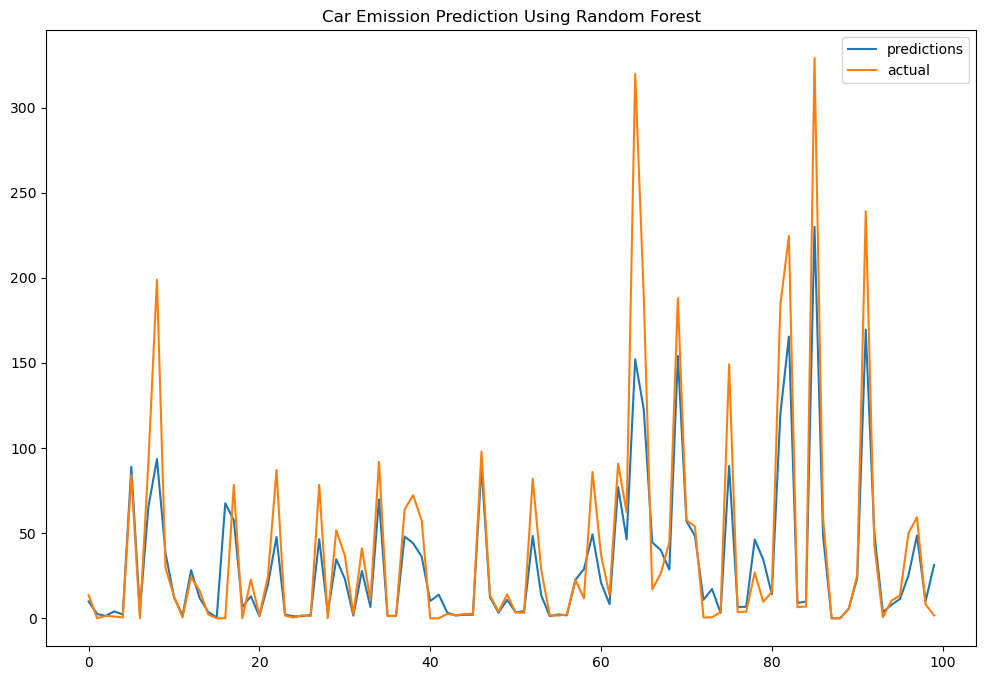

In [9]:
# get the 100 records to test the model
data = df[['Location_ExactCut', 'BoroughName_ExactCut', 'Lts', 'Length (m)', 'Emissions', 'Pollutant']].head(100)
# the 100 actual emission data
actual = df['Car'].head(100)
# get the predictions
prediction = predict_rf(data)

# create a new dataframe containing predicted and actual values
df2 = pd.DataFrame()
df2['predictions'] = prediction
df2['actual'] = actual
# create the plot to show the accuracy of model by comparing actual and predicted values
df2.plot(figsize=(12, 8))
plt.title('Car Emission Prediction Using Random Forest')
plt.show()

/Users/phillipgregory/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


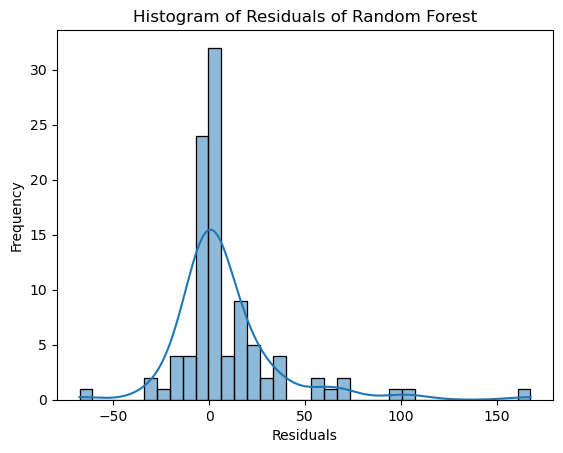

In [10]:
# Histogram of residuals 
# if the histogram is of bell shaped than the model is best fit
residuals = df2['actual'] - df2['predictions']
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals of Random Forest')
plt.show()

# Gradient Boosting Regressor

In [11]:
from sklearn.ensemble import GradientBoostingRegressor

In [12]:
#create object of GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
# train the model by providing X and y
gbr.fit(X_train, y_train)
#store the trained model into binary file (pickle)
with open("gbr.pickle", "wb") as f:
    pickle.dump(gbr, f)

In [13]:
#read the pickle file of model
pickle_in = open("gbr.pickle", "rb")
#load the pickle file of model into the object of GradientBoostingRegressor
gbr = pickle.load(pickle_in)
#predict the emission by providing the X_test input
gbr_pred = gbr.predict(X_test)

In [14]:
# Evaluate the model using metrics
mae_gbr = mean_absolute_error(y_test, gbr_pred)
mse_gbr = mean_squared_error(y_test, gbr_pred)
r2_gbr = r2_score(y_test, gbr_pred)

print("Mean Absolute Error of Gradient Boosting Regressor:", mae_gbr)
print("Mean Squared Error of Gradient Boosting Regressor:", mse_gbr)
print("R-squared Score of Gradient Boosting Regressor:", r2_gbr)

Mean Absolute Error of Gradient Boosting Regressor: 3.392753326547894
Mean Squared Error of Gradient Boosting Regressor: 1503.5699407874877
R-squared Score of Gradient Boosting Regressor: 0.5220455192258906


In [15]:
#this function takes of features and predicts the emission
def predict_gbr(x):
    # encode variables with ordinal encoding so that the categorical data become a numerical for the understanding of model
    encoder = ce.OrdinalEncoder(cols=['Location_ExactCut', 'BoroughName_ExactCut', 'Pollutant', 'Emissions'])
    x = encoder.fit_transform(x)
    #load the stored pickle file of ml model
    pickle_in = open("gbr.pickle", "rb")
    gbr = pickle.load(pickle_in)
    # do the prediction using predict function
    predictions = gbr.predict(x)
    # return the predictions
    return predictions

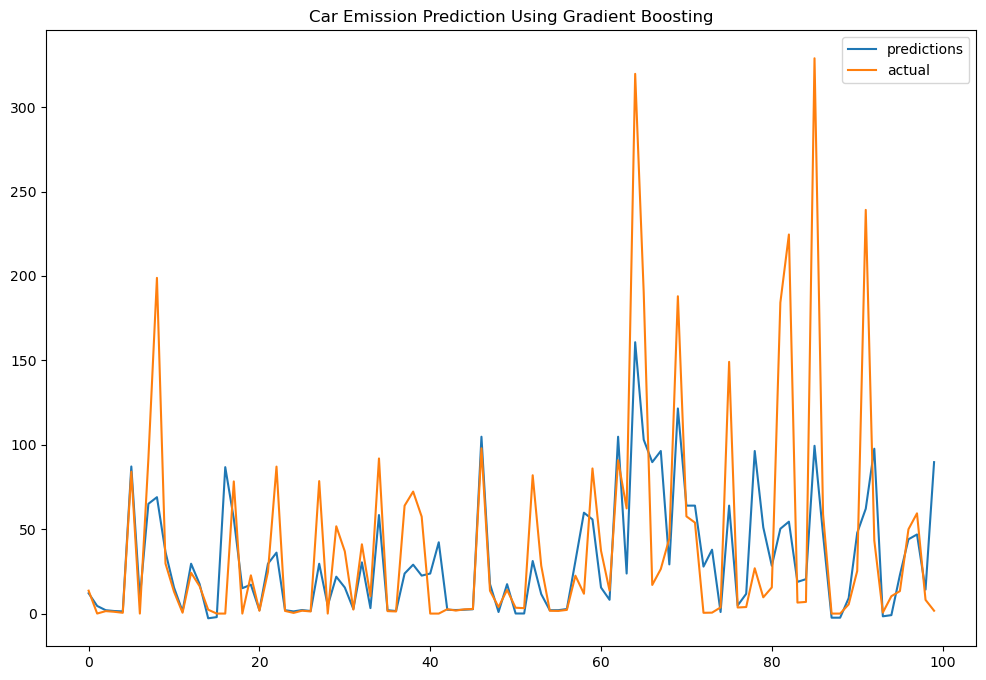

In [16]:
# get the 100 records to test the model
data = df[['Location_ExactCut', 'BoroughName_ExactCut', 'Lts', 'Length (m)', 'Emissions', 'Pollutant']].head(100)
# the 100 actual emission data
actual = df['Car'].head(100)
# get the predictions
prediction = predict_gbr(data)

# create a new dataframe containing predicted and actual values
df3 = pd.DataFrame()
df3['predictions'] = prediction
df3['actual'] = actual
# create the plot to show the accuracy of model by comparing actual and predicted values
df3.plot(figsize=(12, 8))
plt.title('Car Emission Prediction Using Gradient Boosting')
plt.show()

/Users/phillipgregory/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


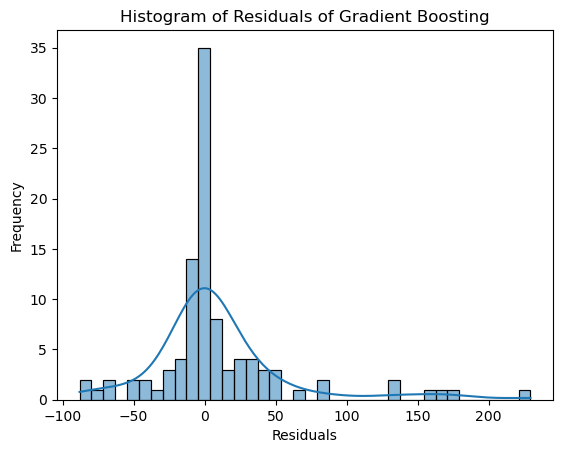

In [17]:
# Histogram of residuals 
# if the histogram is of bell shaped than the model is best fit
residuals = df3['actual'] - df3['predictions']
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals of Gradient Boosting')
plt.show()

# Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression

#create object of LinearRegression
lr = LinearRegression()
# Train a linear regression model
lr.fit(X_train, y_train)
#store the trained model into binary file (pickle)
with open("lr.pickle", "wb") as f:
    pickle.dump(lr, f)

In [19]:
#this function takes of features and predicts the emission
def predict_lr(x):
    # encode variables with ordinal encoding so that the categorical data become a numerical for the understanding of model
    encoder = ce.OrdinalEncoder(cols=['Location_ExactCut', 'BoroughName_ExactCut', 'Emissions', 'Pollutant'])
    x = encoder.fit_transform(x)
    #load the stored pickle file of ml model
    pickle_in = open("lr.pickle", "rb")
    lr = pickle.load(pickle_in)
    # do the prediction using predict function
    predictions = lr.predict(x)
    # return the predictions
    return predictions

In [20]:
#read the pickle file of model
pickle_in = open("lr.pickle", "rb")
#load the pickle file of model into the object of LinearRegression
lr = pickle.load(pickle_in)
# do the prediction using predict function
lr_pred = lr.predict(X_test)

In [21]:
# Evaluate the model using metrics
mae_lr = mean_absolute_error(y_test, lr_pred)
mse_lr = mean_squared_error(y_test, lr_pred)
r2_lr = r2_score(y_test, lr_pred)

print("Mean Absolute Error of Linear Regression:", mae_lr)
print("Mean Squared Erro of Linear Regression:", mse_lr)
print("R-squared Score: of Linear Regression", r2_lr)

Mean Absolute Error of Linear Regression: 6.548226091516909
Mean Squared Erro of Linear Regression: 2875.551988943572
R-squared Score: of Linear Regression 0.085920168705517


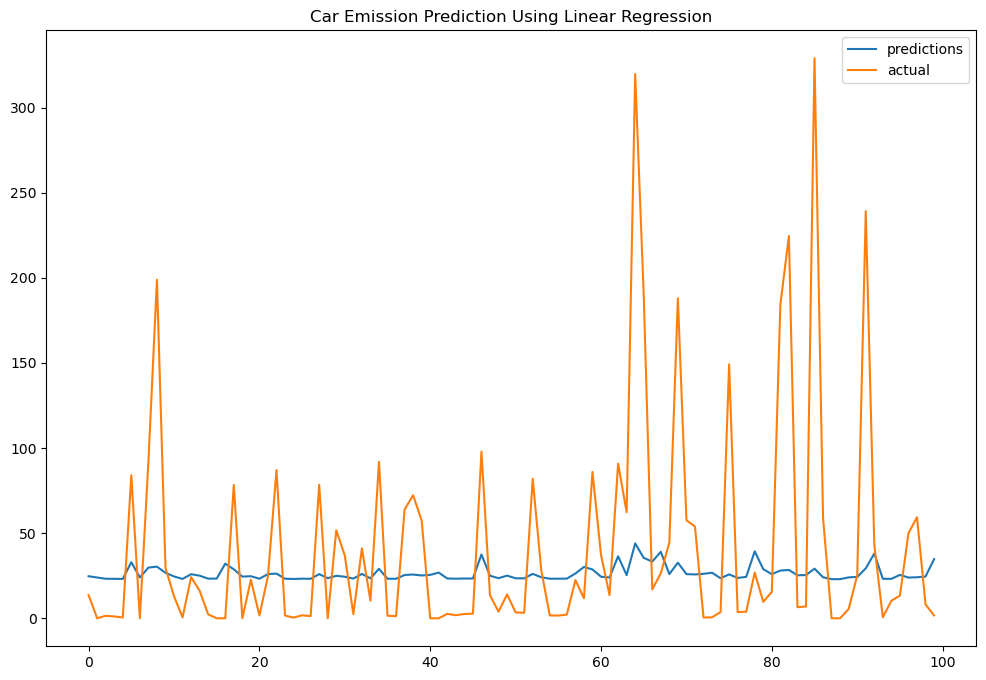

In [22]:
# get the 100 records to test the model
data = df[['Location_ExactCut', 'BoroughName_ExactCut', 'Lts', 'Length (m)', 'Emissions', 'Pollutant']].head(100)
# the 100 actual emission data
actual = df['Car'].head(100)
# get the predictions
prediction = predict_lr(data)

# create a new dataframe containing predicted and actual values
df4 = pd.DataFrame()
df4['predictions'] = prediction
df4['actual'] = actual
# create the plot to show the accuracy of model by comparing actual and predicted values
df4.plot(figsize=(12, 8))
plt.title('Car Emission Prediction Using Linear Regression')
plt.show()

/Users/phillipgregory/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


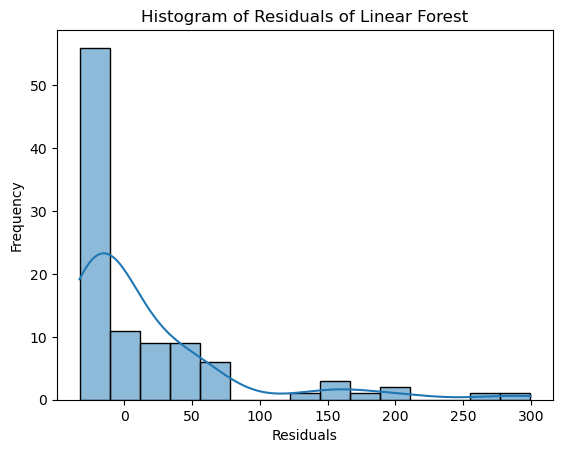

In [23]:
# Histogram of residuals 
# if the histogram is of bell shaped than the model is best fit
residuals = df4['actual'] - df4['predictions']
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals of Linear Forest')
plt.show()

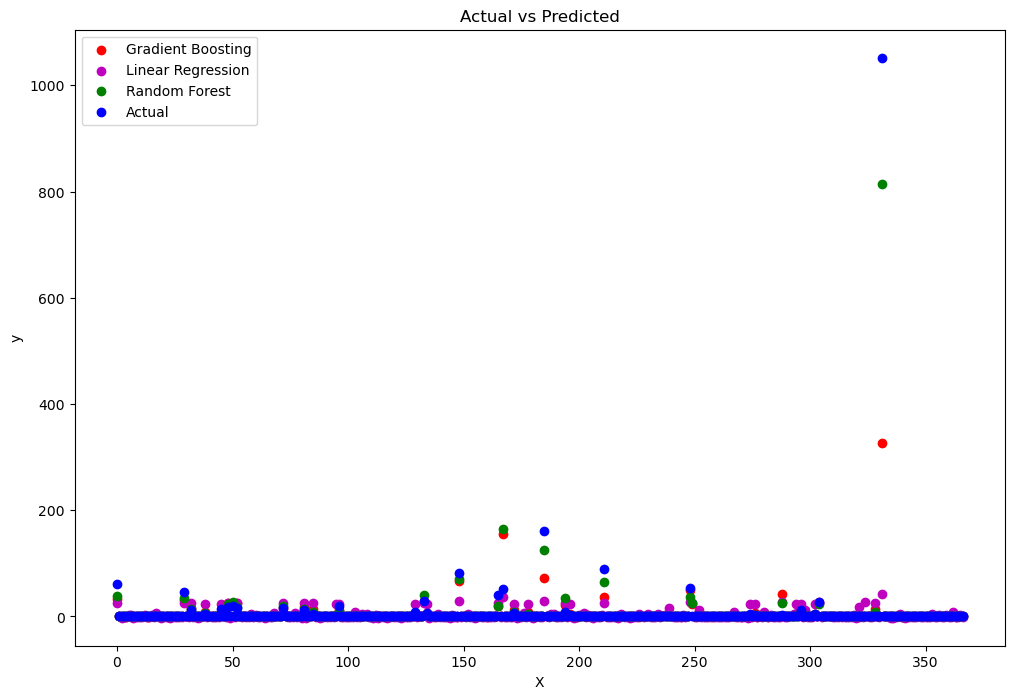

In [24]:
# set the shape of X_test according to pred values
X_test=np.arange(0,len(X_test),1)
# Set the figure size
plt.figure(figsize=(12, 8))
# Plot actual vs predicted
# scatter plot to visualize how well the model predictions align with the actual data 
#we predict the target values (y) using the test data (X_test) for each model
plt.scatter(X_test, gbr_pred, color='r', label='Gradient Boosting')
plt.scatter(X_test, lr_pred, color='m', label='Linear Regression')
plt.scatter(X_test, rf_pred, color='g', label='Random Forest')
plt.scatter(X_test, y_test, color='b', label='Actual')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()
